In [9]:
import warnings
import pandas as pd
import pyfolio as pf

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10000)
warnings.filterwarnings('ignore')

stock_id = 'CPALL'
df_set = pd.read_csv('data/SET Index Historical Data.csv', index_col=0, parse_dates=True)
df_stock_price = pd.read_csv('data/yahoo/{}.csv'.format(stock_id), index_col=0, parse_dates=True)
df_stock_finsheet = pd.read_csv('data/jitta/{}.csv'.format(stock_id), index_col=0, parse_dates=True)

df_set.index = df_set.index.tz_localize('UTC')
df_stock_price.index = df_stock_price.index.tz_localize('UTC')

Start date,2011-01-04
End date,2019-12-30
Total months,104
,Backtest
Annual return,18.6%
Cumulative returns,343.9%
Annual volatility,25.3%
Sharpe ratio,0.80
Calmar ratio,0.52
Stability,0.90
Max drawdown,-35.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.70,2013-02-20,2013-08-30,2015-08-11,645
1,29.10,2018-03-27,2018-10-24,2019-07-10,337
2,23.90,2015-09-02,2016-01-04,2016-07-04,219
3,17.66,2019-07-19,2019-12-30,NaT,NaN
4,17.39,2011-01-06,2011-02-11,2011-03-08,44


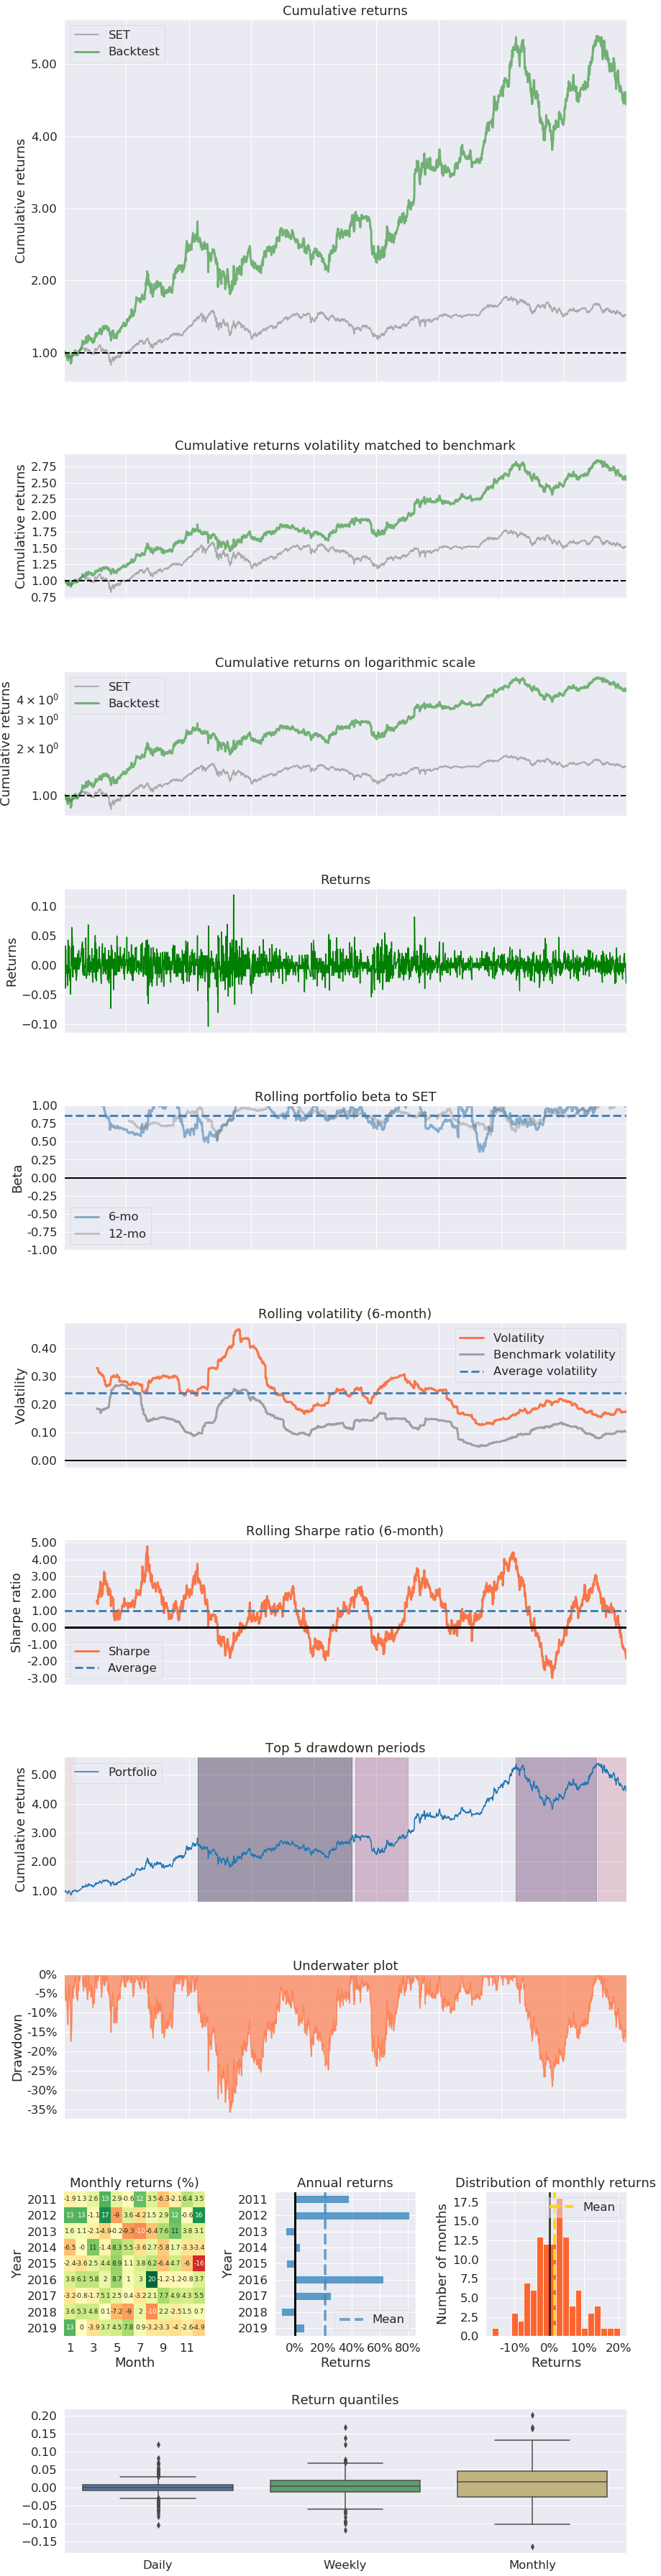

In [13]:
stock_rets = df_stock_price['Return'].loc['2011-01-01':'2019-12-31'].rename(stock_id)
index_rets = df_set['Close'].pct_change().dropna().loc[stock_rets.index].rename('SET')

perf_stats_all = pf.timeseries.perf_stats(returns=stock_rets, factor_returns=index_rets)
pf.create_returns_tear_sheet(returns=stock_rets, benchmark_rets=index_rets, live_start_date=None)